In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# EDA and CLEANING

In [2]:
dataframe=pd.read_csv('Admission_Predict.csv')

In [3]:
dataframe.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataframe=dataframe.drop(labels='Serial No.',axis=1)

# Null value Heatmap

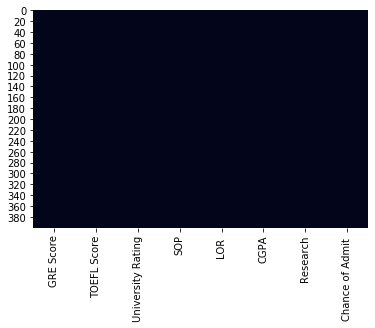

In [5]:
sn.heatmap(dataframe.isnull(), cbar=False)

# Outlier Detection

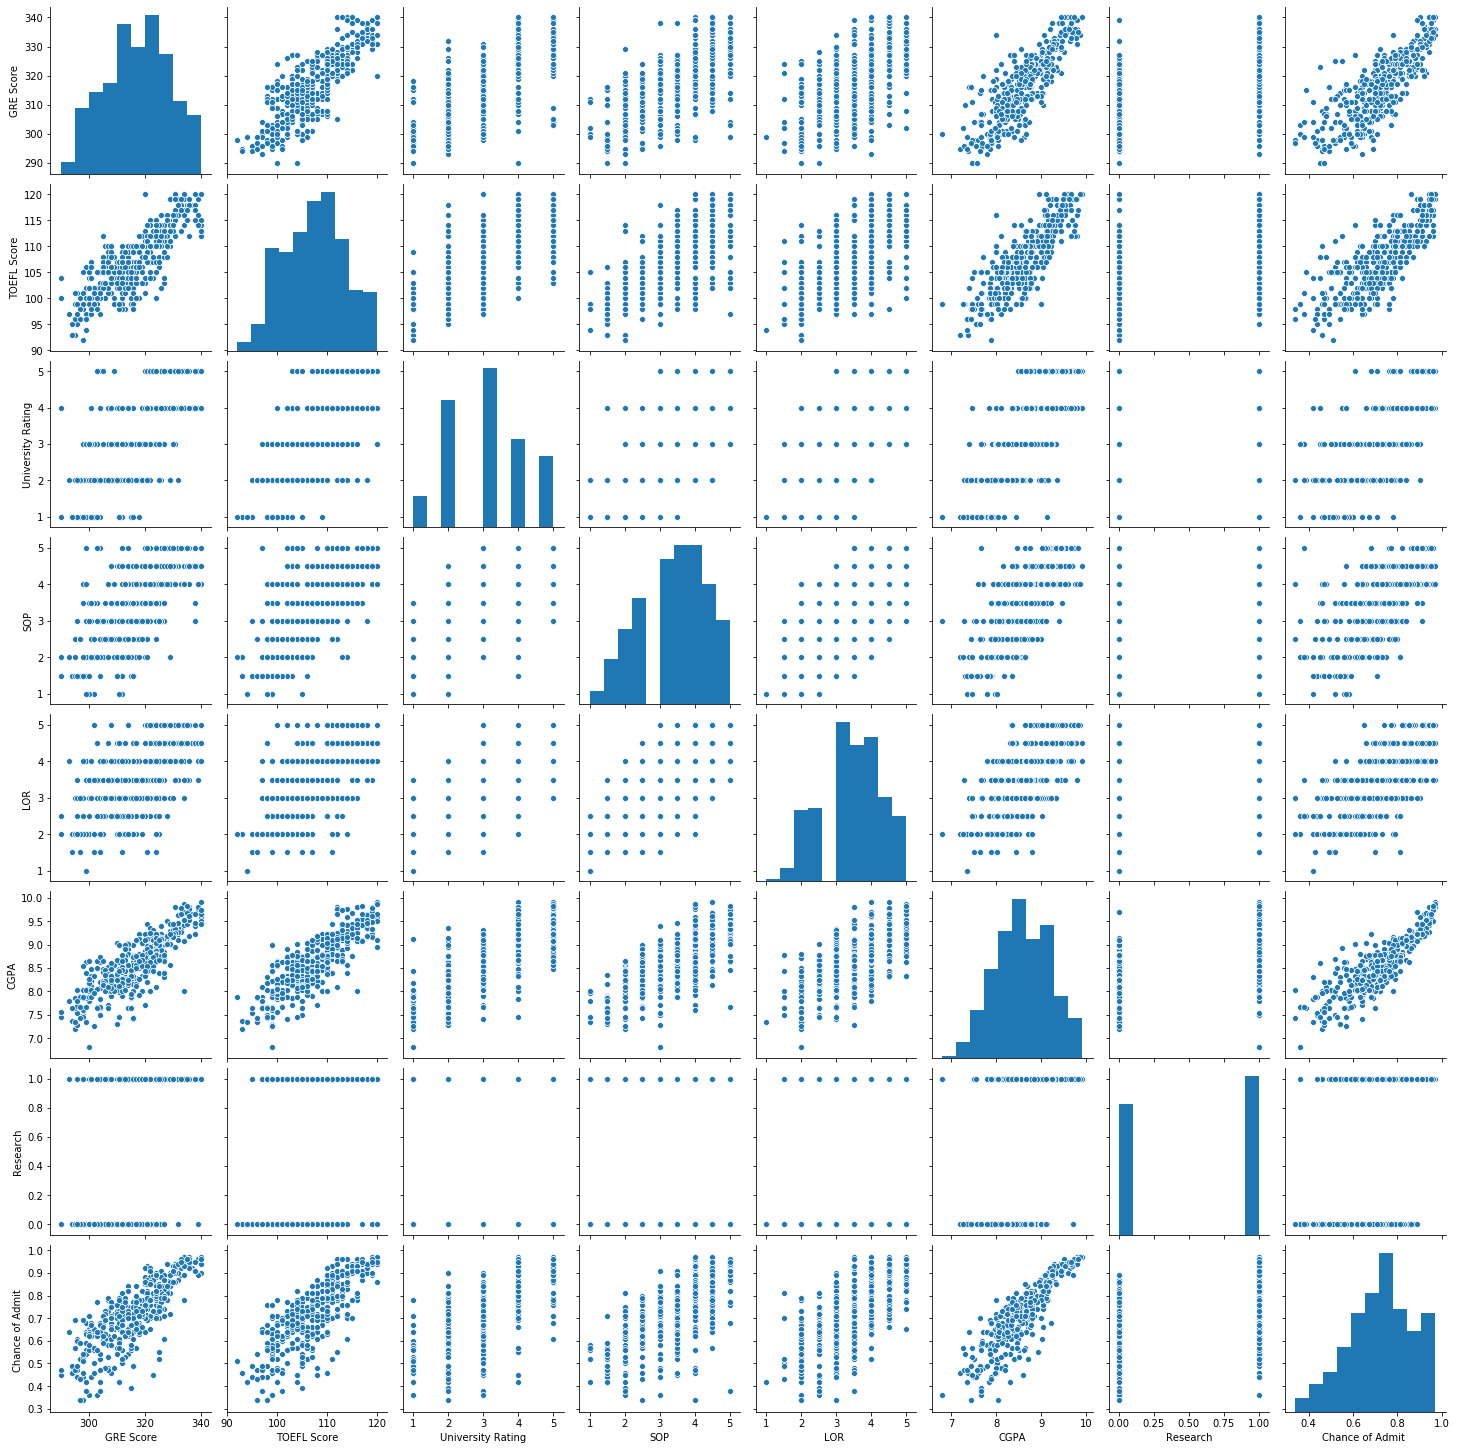

In [7]:
sn.pairplot(dataframe)
plt.show()

# removing outliers using z score

In [8]:
z_scores = stats.zscore(dataframe)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = dataframe[filtered_entries]

In [9]:
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [20]:
y = new_df['Chance of Admit ']

In [21]:
X=new_df.drop(['Chance of Admit '], axis = 1)

In [22]:
new_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# MODEL

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
regressor.score(X_test,y_test)

0.7710995891581415

# Evaluation Metrics

In [27]:
from sklearn import metrics as m
print('The mean absolute error is :: ', m.mean_absolute_error(y_test,y_pred))
print('The mean squared error is :: ',m.mean_squared_error(y_test,y_pred))
print('The RMSE is :: ',np.sqrt(m.mean_squared_error(y_test,y_pred)))

The mean absolute error is ::  0.051436337609135595
The mean squared error is ::  0.0045326716292148055
The RMSE is ::  0.06732511885778447
